In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#load json file into dataframe
df_palette = pd.read_json('../data/palette.json')
df_palette = df_palette.transpose()
#make the index a column called Color
df_palette.reset_index(level=0, inplace=True)
df_palette.rename(columns={'index':'Color'}, inplace=True)
df_palette

,Color,Hex,Certainty
0,Yellow Mid,#ffeb00,Mid
1,Deep Cian Blue,#0014ff,Low
2,Phthalo Blue,#000f89,High
3,Purple,#800080,High
4,Silver,#c0c0c0,High
5,Crimson,#dc143c,High
6,Orange,#ffa500,High
7,Magenta,#ff00ff,High
8,Raw Sienna,#d68a59,High
9,Lamp Black,#2c2c2c,High


In [4]:
#add a ymc column to the dataframe
df_palette['cmk'] = df_palette['Hex'].apply(hex_to_rgb).apply(rgb_to_cmk)

In [6]:
len_palette = len(df_palette)
proportions = [[0.5, 0.5], [0.75, 0.25], [0.25, 0.75]]
#proportions = [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
list_2_colors = []
#combining two colors
for i in range(len_palette):
    color_i = df_palette['cmk'][i]
    for j in range(len_palette):
        color_j = df_palette['cmk'][j]
        if i == j:
            continue

        for proportion in proportions:  
            cmk_color = combine_cmk_colors([color_i, color_j], proportion)
            dict_colors = {
            'color_i': df_palette['Color'][i],
            'color_j': df_palette['Color'][j],
            'color_i_hex': df_palette['Hex'][i], 
            'color_j_hex': df_palette['Hex'][j],
            'proportion_i': proportion[0],
            'proportion_j': proportion[1],
            'color_ij_hex': rgb_to_hex(cmk_to_rgb(cmk_color))
            }
            list_2_colors.append(dict_colors)


            
    

In [7]:
len_palette = len(df_palette)
proportions_3colors = [[0.33, 0.33, 0.33], [0.5, 0.25, 0.25], [0.25, 0.5, 0.25], [0.25, 0.25, 0.5]]

list_3_colors = []
#combining two colors
for i in range(len_palette):
    color_i = df_palette['cmk'][i]
    for j in range(len_palette):
        color_j = df_palette['cmk'][j]
        for k in range(len_palette):
            color_k = df_palette['cmk'][k]
            if i == j == k:
                continue

            for proportion in proportions_3colors:  
                cmk_color = combine_cmk_colors([color_i, color_j, color_k], proportion)
                dict_colors = {
                'color_i': df_palette['Color'][i],
                'color_j': df_palette['Color'][j],
                'color_k': df_palette['Color'][k],  
                'color_i_hex': df_palette['Hex'][i], 
                'color_j_hex': df_palette['Hex'][j],
                'color_k_hex': df_palette['Hex'][k],
                'proportion_i': proportion[0],
                'proportion_j': proportion[1],
                'proportion_k': proportion[2],
                'color_ijk_hex': rgb_to_hex(cmk_to_rgb(cmk_color))
                }
                list_3_colors.append(dict_colors)

In [8]:
df_3_colors = pd.DataFrame(list_3_colors)
df_3_colors

,color_i,color_j,color_k,color_i_hex,color_j_hex,color_k_hex,proportion_i,proportion_j,proportion_k,color_ijk_hex
0,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.33,0.33,0.33,#aaa354
1,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.50,0.25,0.25,#bfb53f
2,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.25,0.50,0.25,#bfb53f
3,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.25,0.25,0.50,#7f7f7f
4,Yellow Mid,Yellow Mid,Phthalo Blue,#ffeb00,#ffeb00,#000f89,0.33,0.33,0.33,#aaa12d
...,...,...,...,...,...,...,...,...,...,...
55195,Lemon Yellow,Lemon Yellow,Cerulean Blue,#fff700,#fff700,#2a52be,0.25,0.25,0.50,#94a45f
55196,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.33,0.33,0.33,#b0b60b
55197,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.50,0.25,0.25,#c3c608
55198,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.25,0.50,0.25,#c3c608


In [9]:
df_2_colors = pd.DataFrame(list_2_colors)
df_2_colors

,color_i,color_j,color_i_hex,color_j_hex,proportion_i,proportion_j,color_ij_hex
0,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.50,0.50,#7f7f7f
1,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.75,0.25,#bfb53f
2,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.25,0.75,#3f49bf
3,Yellow Mid,Phthalo Blue,#ffeb00,#000f89,0.50,0.50,#7f7d44
4,Yellow Mid,Phthalo Blue,#ffeb00,#000f89,0.75,0.25,#bfb322
...,...,...,...,...,...,...,...
1651,Lemon Yellow,Cerulean Blue,#fff700,#2a52be,0.75,0.25,#c9cd2f
1652,Lemon Yellow,Cerulean Blue,#fff700,#2a52be,0.25,0.75,#5f7b8e
1653,Lemon Yellow,Phthalo Green,#fff700,#123524,0.50,0.50,#889611
1654,Lemon Yellow,Phthalo Green,#fff700,#123524,0.75,0.25,#c3c608


color_i            Burnt Umber
color_j         Titanium White
color_i_hex            #8a3324
color_j_hex            #FFFFFF
proportion_i               0.5
proportion_j               0.5
color_ij_hex           #c49991
Name: 789, dtype: object


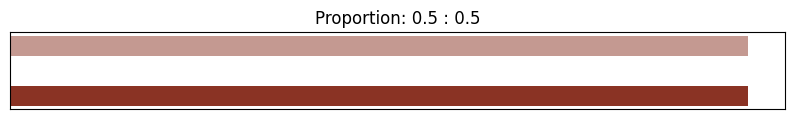

In [10]:
#fucntion to plot three colors one side by side, 3 vertical rectangles, color is passed in hex
def plot_2_colors(color_i_hex, color_j_hex, color_ij_hex, proportion_i, proportion_j):
    fig, ax = plt.subplots(figsize=(10, 1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Proportion: ' + str(proportion_i) + ' : ' + str(proportion_j))
    ax.barh(0, 1, color=color_i_hex)
    ax.barh(1, 1, color=color_j_hex)
    ax.barh(2, 1, color=color_ij_hex)
    plt.show()

idx = 789
print(df_2_colors.iloc[idx])
plot_2_colors(df_2_colors.loc[idx,"color_i_hex"], df_2_colors.loc[idx,"color_j_hex"], df_2_colors.loc[idx,"color_ij_hex"],df_2_colors.loc[idx,"proportion_i"],df_2_colors.loc[idx,"proportion_j"])

color_i           Phthalo Blue
color_j          Phthalo Green
color_k             Raw Sienna
color_i_hex            #000f89
color_j_hex            #123524
color_k_hex            #d68a59
proportion_i              0.25
proportion_j               0.5
proportion_k              0.25
color_ijk_hex          #3e404a
Name: 6742, dtype: object


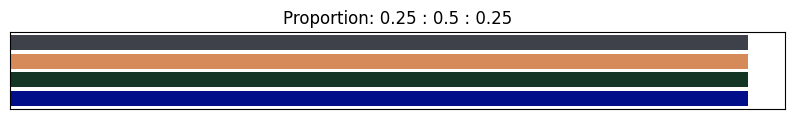

In [11]:
def plot_3_colors(color_i_hex, color_j_hex, color_k_hex, color_ijk_hex, proportion_i, proportion_j, proportion_k):
    fig, ax = plt.subplots(figsize=(10, 1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Proportion: ' + str(proportion_i) + ' : ' + str(proportion_j) + ' : ' + str(proportion_k))
    ax.barh(0, 1, color=color_i_hex)
    ax.barh(1, 1, color=color_j_hex)
    ax.barh(2, 1, color=color_k_hex)
    ax.barh(3, 1, color=color_ijk_hex)
    plt.show()

idx = 6742
print(df_3_colors.iloc[idx])
plot_3_colors(df_3_colors.loc[idx,"color_i_hex"], df_3_colors.loc[idx,"color_j_hex"], df_3_colors.loc[idx,"color_k_hex"], df_3_colors.loc[idx,"color_ijk_hex"],df_3_colors.loc[idx,"proportion_i"],df_3_colors.loc[idx,"proportion_j"],df_3_colors.loc[idx,"proportion_k"])


In [12]:
#function that maps hsv to a two dimensional space, color triangle
def hsv_to_triangle(hex):
    hsv = rgb_to_hsv(hex_to_rgb(hex))
    h = hsv[0]
    s = hsv[1]
    v = hsv[2]
    x = s*np.cos(h*np.pi/180)
    y = s*np.sin(h*np.pi/180)
    return (x, y)

In [13]:
#fucntion to map a hex color to a 2d color to plot in a color triangle
def map_hex_to_2d(hex_color):
    rgb_color = hex_to_rgb(hex_color)
    cmk_color = rgb_to_cmk(rgb_color)
    x = cmk_color[0] - cmk_color[2]/2
    y = cmk_color[1] - cmk_color[2]/2
    return [x,y]

In [14]:
import math

def map_hex_to_wheel(hex_color, image_size=10):
    rgb = hex_to_rgb(hex_color)
    hsv = rgb_to_hsv(rgb)

    rads = math.tau * hsv[0] - math.pi
    mag = hsv[1] * (image_size/2) - 1 


    x = math.cos(rads) * mag + (image_size/2)
    y =math.sin(rads) * mag + (image_size/2)

    return (x, y)

#map hex color to a x,y coordinates that correspond to a maxell color triangle
def map_hex_to_triangle(hex_color):
    rgb_color = hex_to_rgb(hex_color)
    cmk_color = rgb_to_cmk(rgb_color)
    x = cmk_color[0] - cmk_color[2]/2
    y = cmk_color[1] - cmk_color[2]/2
    return [x,y]



In [15]:
#df_2_colors['color_i_2d'] = df_2_colors['color_ij_hex'].apply(map_hex_to_2d)
df_2_colors['color_ij_2d'] = df_2_colors['color_ij_hex'].apply(hsv_to_triangle)
df_2_colors

,color_i,color_j,color_i_hex,color_j_hex,proportion_i,proportion_j,color_ij_hex,color_ij_2d
0,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.50,0.50,#7f7f7f,"(0.0, 0.0)"
1,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.75,0.25,#bfb53f,"(0.3813864851963297, 0.5510488587994304)"
2,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.25,0.75,#3f49bf,"(-0.38138648519632995, -0.5510488587994303)"
3,Yellow Mid,Phthalo Blue,#ffeb00,#000f89,0.50,0.50,#7f7d44,"(0.24641601243358127, 0.39382937988575256)"
4,Yellow Mid,Phthalo Blue,#ffeb00,#000f89,0.75,0.25,#bfb322,"(0.4665961211507813, 0.6767236106247555)"
...,...,...,...,...,...,...,...,...
1651,Lemon Yellow,Cerulean Blue,#fff700,#2a52be,0.75,0.25,#c9cd2f,"(0.3675369035400193, 0.6774540495119246)"
1652,Lemon Yellow,Cerulean Blue,#fff700,#2a52be,0.25,0.75,#5f7b8e,"(-0.30176777298865903, -0.13597017114123414)"
1653,Lemon Yellow,Phthalo Green,#fff700,#123524,0.50,0.50,#889611,"(0.35616994319229967, 0.8119856829674843)"
1654,Lemon Yellow,Phthalo Green,#fff700,#123524,0.75,0.25,#c3c608,"(0.46599211564505977, 0.8388538334117164)"


In [16]:
df_3_colors['color_ijk_2d'] = df_3_colors['color_ijk_hex'].apply(hsv_to_triangle)

1656
0.0
6.038647342995169
12.077294685990339
18.115942028985508
24.154589371980677
30.193236714975846
36.231884057971016
42.270531400966185
48.309178743961354
54.34782608695652
60.38647342995169
66.42512077294685
72.46376811594203
78.5024154589372
84.54106280193237
90.57971014492753
96.61835748792271


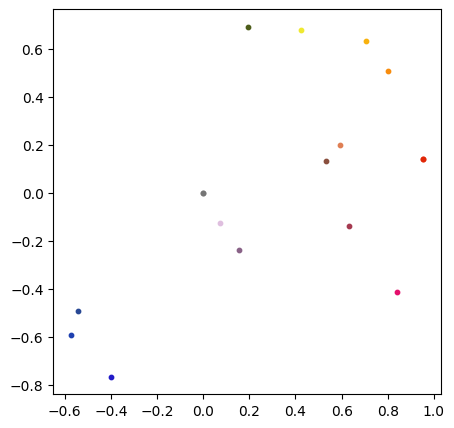

In [17]:
#plot all the x y colors in the dataframe in a 2s scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
print(len(df_2_colors))
for i in range(len(df_2_colors)):
    if i%100 == 0:
        print(100 * i/len(df_2_colors))
        plt.scatter(df_2_colors['color_ij_2d'][i][0], df_2_colors['color_ij_2d'][i][1], color=df_2_colors['color_ij_hex'][i], s=10)

plt.show()


55200
0.0
0.18115942028985507
0.36231884057971014
0.5434782608695652
0.7246376811594203
0.9057971014492754
1.0869565217391304
1.2681159420289856
1.4492753623188406
1.6304347826086956
1.8115942028985508
1.9927536231884058
2.1739130434782608
2.3550724637681157
2.536231884057971
2.717391304347826
2.898550724637681
3.079710144927536
3.260869565217391
3.4420289855072466
3.6231884057971016
3.8043478260869565
3.9855072463768115
4.166666666666667
4.3478260869565215
4.528985507246377
4.7101449275362315
4.891304347826087
5.072463768115942
5.253623188405797
5.434782608695652
5.615942028985507
5.797101449275362
5.978260869565218
6.159420289855072
6.340579710144928
6.521739130434782
6.702898550724638
6.884057971014493
7.065217391304348
7.246376811594203
7.427536231884058
7.608695652173913
7.7898550724637685
7.971014492753623
8.152173913043478
8.333333333333334
8.514492753623188
8.695652173913043
8.876811594202898
9.057971014492754
9.23913043478261
9.420289855072463
9.601449275362318
9.7826086956521

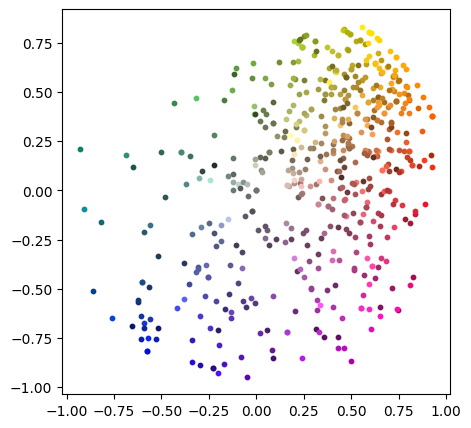

In [18]:
#plot all the x y colors in the dataframe in a 2s scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
print(len(df_3_colors))
for i in range(len(df_3_colors)):
    if i%100 == 0:
        print(100 * i/len(df_3_colors))
        plt.scatter(df_3_colors['color_ijk_2d'][i][0], df_3_colors['color_ijk_2d'][i][1], color=df_3_colors['color_ijk_hex'][i], s=10)

In [20]:
df_3_colors

,color_i,color_j,color_k,color_i_hex,color_j_hex,color_k_hex,proportion_i,proportion_j,proportion_k,color_ijk_hex,color_ijk_2d
0,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.33,0.33,0.33,#aaa354,"(0.2893206061158721, 0.4149825802296349)"
1,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.50,0.25,0.25,#bfb53f,"(0.3813864851963297, 0.5510488587994304)"
2,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.25,0.50,0.25,#bfb53f,"(0.3813864851963297, 0.5510488587994304)"
3,Yellow Mid,Yellow Mid,Deep Cian Blue,#ffeb00,#ffeb00,#0014ff,0.25,0.25,0.50,#7f7f7f,"(0.0, 0.0)"
4,Yellow Mid,Yellow Mid,Phthalo Blue,#ffeb00,#ffeb00,#000f89,0.33,0.33,0.33,#aaa12d,"(0.41456939507604906, 0.6072805415231459)"
...,...,...,...,...,...,...,...,...,...,...,...
55195,Lemon Yellow,Lemon Yellow,Cerulean Blue,#fff700,#fff700,#2a52be,0.25,0.25,0.50,#94a45f,"(0.11658304084452156, 0.4042568046791346)"
55196,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.33,0.33,0.33,#b0b60b,"(0.43957206452158754, 0.8303916062191596)"
55197,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.50,0.25,0.25,#c3c608,"(0.46599211564505977, 0.8388538334117164)"
55198,Lemon Yellow,Lemon Yellow,Phthalo Green,#fff700,#fff700,#123524,0.25,0.50,0.25,#c3c608,"(0.46599211564505977, 0.8388538334117164)"


In [22]:
target_color = '#ADAD33'
target_cmk_color = np.array(rgb_to_cmk(hex_to_rgb(target_color)))
#color ijk hex to cmk
df_3_colors['color_ijk_cmk'] = df_3_colors['color_ijk_hex'].apply(hex_to_rgb).apply(rgb_to_cmk)
#compute the distance from the target color and the colors in the 3d dataframe in cmk space
df_3_colors['distance'] = df_3_colors['color_ijk_cmk'].apply(lambda x: np.linalg.norm(np.array(x) - target_cmk_color))
df_3_colors.sort_values(by=['distance'], inplace=True)
#get the top 10 closest colors
df_3_colors.head(10)

,color_i,color_j,color_k,color_i_hex,color_j_hex,color_k_hex,proportion_i,proportion_j,proportion_k,color_ijk_hex,color_ijk_2d,color_ijk_cmk,distance
53184,Lemon Yellow,Phthalo Blue,Lemon Yellow,#fff700,#000f89,#fff700,0.33,0.33,0.33,#aaa92d,"(0.3729687990663155, 0.633681082540261)","(0.33333333333333337, 0.33725490196078434, 0.8...",0.030628
6896,Phthalo Blue,Lemon Yellow,Lemon Yellow,#000f89,#fff700,#fff700,0.33,0.33,0.33,#aaa92d,"(0.3729687990663155, 0.633681082540261)","(0.33333333333333337, 0.33725490196078434, 0.8...",0.030628
55116,Lemon Yellow,Lemon Yellow,Phthalo Blue,#fff700,#fff700,#000f89,0.33,0.33,0.33,#aaa92d,"(0.3729687990663155, 0.633681082540261)","(0.33333333333333337, 0.33725490196078434, 0.8...",0.030628
14448,Orange,Orange,Monastral Green,#ffa500,#ffa500,#01ac8c,0.33,0.33,0.33,#aaa72e,"(0.3805912391881821, 0.6222474034855858)","(0.33333333333333337, 0.34509803921568627, 0.8...",0.032810
15644,Orange,Monastral Green,Orange,#ffa500,#01ac8c,#ffa500,0.33,0.33,0.33,#aaa72e,"(0.3805912391881821, 0.6222474034855858)","(0.33333333333333337, 0.34509803921568627, 0.8...",0.032810
44300,Monastral Green,Orange,Orange,#01ac8c,#ffa500,#ffa500,0.33,0.33,0.33,#aaa72e,"(0.3805912391881821, 0.6222474034855858)","(0.33333333333333337, 0.34509803921568627, 0.8...",0.032810
11311,Silver,Phthalo Green,Yellow Mid,#c0c0c0,#123524,#ffeb00,0.25,0.25,0.50,#b3b238,"(0.3486293845340515, 0.592143417077447)","(0.29803921568627456, 0.3019607843137255, 0.78...",0.036367
9290,Silver,Yellow Mid,Phthalo Green,#c0c0c0,#ffeb00,#123524,0.25,0.50,0.25,#b3b238,"(0.3486293845340515, 0.592143417077447)","(0.29803921568627456, 0.3019607843137255, 0.78...",0.036367
469,Yellow Mid,Silver,Phthalo Green,#ffeb00,#c0c0c0,#123524,0.50,0.25,0.25,#b3b238,"(0.3486293845340515, 0.592143417077447)","(0.29803921568627456, 0.3019607843137255, 0.78...",0.036367
50618,Phthalo Green,Yellow Mid,Silver,#123524,#ffeb00,#c0c0c0,0.25,0.50,0.25,#b3b238,"(0.3486293845340515, 0.592143417077447)","(0.29803921568627456, 0.3019607843137255, 0.78...",0.036367


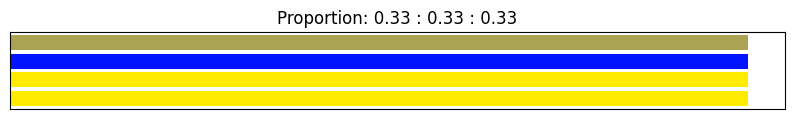

In [24]:
#plot the three colors and the target color
idx = 0
plot_3_colors(df_3_colors.loc[idx,"color_i_hex"], df_3_colors.loc[idx,"color_j_hex"], df_3_colors.loc[idx,"color_k_hex"], df_3_colors.loc[idx,"color_ijk_hex"],df_3_colors.loc[idx,"proportion_i"],df_3_colors.loc[idx,"proportion_j"],df_3_colors.loc[idx,"proportion_k"])

In [13]:
#hex to cmk
print(rgb_to_cmk(hex_to_rgb('#fff700')))
print(rgb_to_cmk(hex_to_rgb('#000f89')))    

print((0.33, 0.66*0.031 + 0.33*0.941, 0.66*1 + 0.33*0.46))

print("Output: ", rgb_to_cmk(hex_to_rgb('#aaa92d')))
print("Target: ", rgb_to_cmk(hex_to_rgb('#ADAD33')))    


(0.0, 0.03137254901960784, 1.0)
(1.0, 0.9411764705882353, 0.4627450980392157)
(0.33, 0.33098999999999995, 0.8118000000000001)
Output:  (0.33333333333333337, 0.33725490196078434, 0.8235294117647058)
Target:  (0.32156862745098036, 0.32156862745098036, 0.8)


In [15]:
hex_to_rgb('#aaa92d')

(170, 169, 45)